Accuracy: 68.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.55      0.63        31
           2       0.80      0.77      0.79        31
           3       0.70      0.78      0.74        27
           4       0.44      0.36      0.40        11
           5       0.62      0.50      0.56        10
           6       0.81      0.62      0.70        21
           7       0.61      0.76      0.68        25
           8       0.69      0.89      0.78        28
           9       0.68      0.63      0.65        27
          10       0.71      0.71      0.71        17
          11       0.76      0.92      0.83        24
          12       0.72      0.54      0.62        24
          13       0.75      0.58      0.66        36
          14       0.60      0.60      0.60         5
          15       0.56      0.70      0.62        33
          16       0.42      0.59      0.49        17
          17       0.62      0.63      

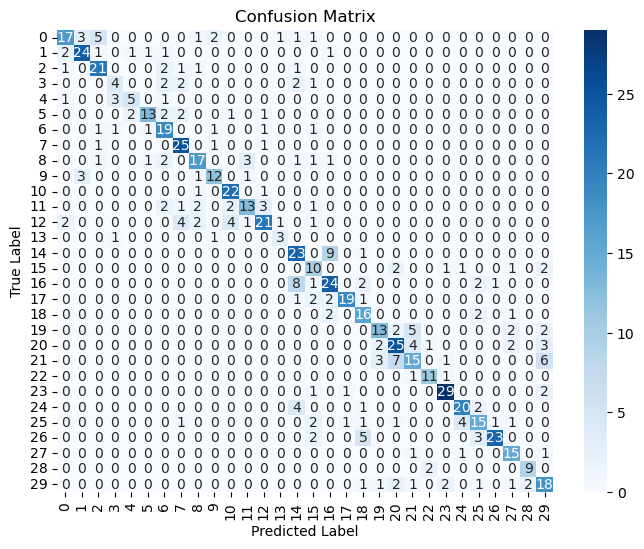

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    data = pd.read_excel("C:/Users/20201954/Desktop/data/cleaned_qMRI_numerical.xlsx")
    #data = data.drop(columns=['volume', 'trk_leng', 'trk_ang', 'dix_snr'])
except UnicodeDecodeError:
    # If UTF-8 doesn't work, try ISO-8859-1 or latin1
    data = pd.read_csv('/path_to_your_file.csv', encoding='latin1')

# Preprocessing
# Convert decimal commas to points for proper numerical handling
data.replace(',', '.', regex=True, inplace=True)

# Selecting features and target
X = data.drop(columns=['muscleID'])  # All columns except the muscle ID (which is the target)
y = data['muscleID']  # The target column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Feature importance berekenen na het trainen van het model
importances = model.feature_importances_

# Selecteer features met hoge importance scores (bijvoorbeeld boven een drempel)
important_features = X.columns[importances > 0.02]  # Stel hier een drempel in, zoals 0.02

# Train opnieuw met alleen de belangrijke features
X_train_important = X_train_scaled[:, importances > 0.04]
X_test_important = X_test_scaled[:, importances > 0.04]

# Train opnieuw het model met de geselecteerde features
model.fit(X_train_important, y_train)
y_pred_important = model.predict(X_test_important)

# Bereken de nauwkeurigheid en vergelijk met eerdere resultaten
accuracy = accuracy_score(y_test, y_pred_important)
print(f"Accuracy with selected features: {accuracy * 100:.2f}%")


Accuracy with selected features: 69.80%
